Linear regression using gradient descent.

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As we can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

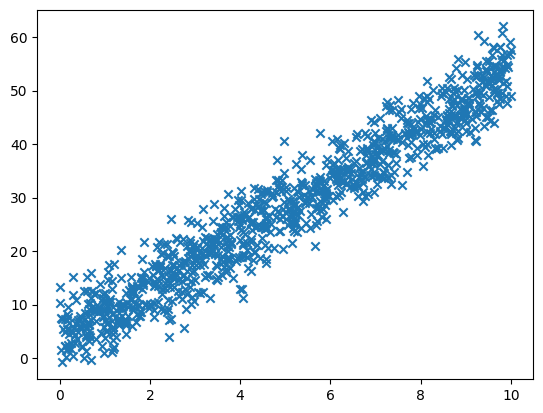

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Our tasks here are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation (as in the previous exercise)
 - Calculate the predictions, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error. Use `y` for computing the loss, not `ground_truth`.
 - Derive a formula for calculating the gradient and implement it using numpy. The result of the gradient should be `[[-366.03967789]
 [ -56.30949238]]` 

 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If the solution converges, draw the regressed line along with the data points.

## Solution

In [5]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on
print(weights.shape)

(2, 1)


 Add a column of ones to `X`, as we want to simplify the bias calculation 

In [6]:
import numpy as np
ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]
print(X.shape)
print(X_.shape)

(1000, 1)
(1000, 2)


Calculate the predictions with a matrix multiplication.

In [7]:
X_mat = np.matrix(X_)
y_mat = np.matrix(y)
predictions = X_mat @ weights

Calculate the loss based on the mean-squared-error. Use `y` for computing the loss, not `ground_truth`.

In [8]:
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y, np.array(predictions)))

MSE: 1030.5996567892532


Derive a formula for calculating the gradient implement it using numpy. The result of the gradient should be `[[-366.03967789]
 [ -56.30949238]]

In [9]:
def compute_gradient(X, y, weights):
    N = X.shape[0]  
    predictions = X_mat @ weights

    residuals = y - predictions 
    gradient = -(2 / N) * (X_mat.T @ residuals)  
    return gradient

gradient = compute_gradient(X_mat, y, weights)
print("Gradient:", gradient)

Gradient: [[-366.03967789]
 [ -56.30949238]]


Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.

Learning rate = 0.01,iterations = 1000


In [10]:
iterations = 1000
learning_rate = 0.01
loss_history = []
for i in range(iterations):
    predictions = X_mat @ weights

    residuals = y - predictions
    
    loss = np.linalg.norm(residuals,2)**2 / n_samples  
    loss_history.append(loss)

    gradient = -(2 / n_samples) * (X_mat.T @ residuals)

    weights = weights - learning_rate * gradient

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

print("\nFinal weights:")
print(weights)
print(f"Final loss: {loss_history[-1]:.4f}")

Iteration 0: Loss = 1030.5997
Iteration 100: Loss = 15.2447
Iteration 200: Loss = 15.0411
Iteration 300: Loss = 14.9663
Iteration 400: Loss = 14.9389
Iteration 500: Loss = 14.9288
Iteration 600: Loss = 14.9251
Iteration 700: Loss = 14.9238
Iteration 800: Loss = 14.9233
Iteration 900: Loss = 14.9231

Final weights:
[[4.96305114]
 [3.29633028]]
Final loss: 14.9230


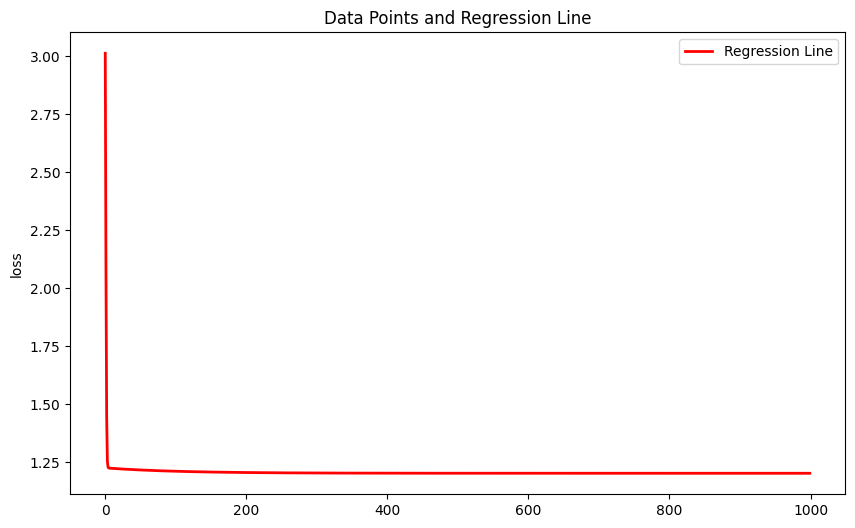

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(np.log10(1+np.array(loss_history)), color='red', linewidth=2, label='Regression Line')
plt.ylabel('loss')
plt.title('Data Points and Regression Line')
plt.legend()
plt.show()

Learning rate = 0.001, iterations = 10000


In [12]:
iterations = 10000
learning_rate = 0.001
weights = generate_weights(X.shape[-1] + 1) 
loss_history = []
for i in range(iterations):
    predictions = X_mat @ weights

    residuals = y - predictions
    
    loss = np.linalg.norm(residuals,2)**2 / n_samples  
    loss_history.append(loss)

    gradient = -(2 / n_samples) * (X_mat.T @ residuals)

    weights = weights - learning_rate * gradient

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

print("\nFinal weights:")
print(weights)
print(f"Final loss: {loss_history[-1]:.4f}")

Iteration 0: Loss = 1030.5997
Iteration 100: Loss = 15.7170
Iteration 200: Loss = 15.6407
Iteration 300: Loss = 15.5724
Iteration 400: Loss = 15.5106
Iteration 500: Loss = 15.4547
Iteration 600: Loss = 15.4041
Iteration 700: Loss = 15.3583
Iteration 800: Loss = 15.3169
Iteration 900: Loss = 15.2794
Iteration 1000: Loss = 15.2455
Iteration 1100: Loss = 15.2148
Iteration 1200: Loss = 15.1870
Iteration 1300: Loss = 15.1619
Iteration 1400: Loss = 15.1392
Iteration 1500: Loss = 15.1186
Iteration 1600: Loss = 15.1000
Iteration 1700: Loss = 15.0831
Iteration 1800: Loss = 15.0679
Iteration 1900: Loss = 15.0541
Iteration 2000: Loss = 15.0416
Iteration 2100: Loss = 15.0303
Iteration 2200: Loss = 15.0201
Iteration 2300: Loss = 15.0109
Iteration 2400: Loss = 15.0025
Iteration 2500: Loss = 14.9950
Iteration 2600: Loss = 14.9881
Iteration 2700: Loss = 14.9819
Iteration 2800: Loss = 14.9763
Iteration 2900: Loss = 14.9712
Iteration 3000: Loss = 14.9666
Iteration 3100: Loss = 14.9625
Iteration 3200: Lo

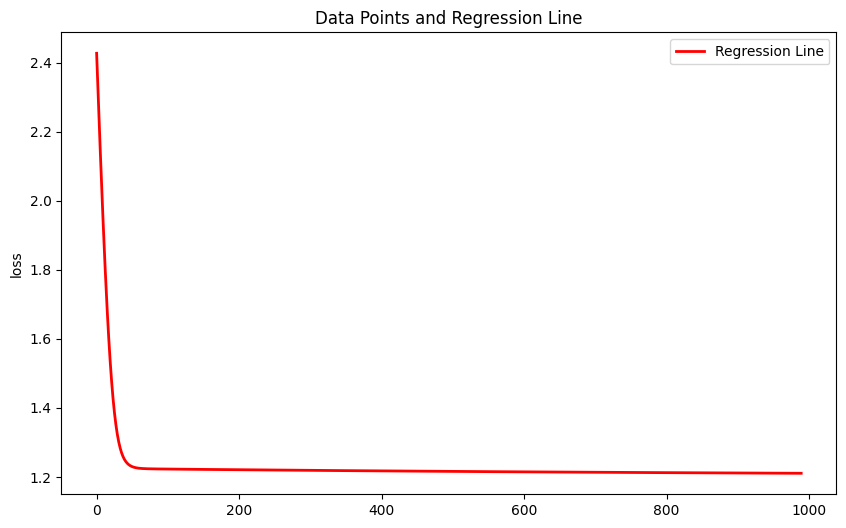

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(np.log10(1+np.array(loss_history[10:1000])), color='red', linewidth=2, label='Regression Line')
plt.ylabel('loss')
plt.title('Data Points and Regression Line')
plt.legend()
plt.show()

Learning rate 0.1, iterations = 100


In [14]:
iterations = 100
learning_rate = 0.1
weights = generate_weights(X.shape[-1] + 1)
loss_history = []
for i in range(iterations):
    predictions = X_mat @ weights

    residuals = y - predictions
    
    loss = np.linalg.norm(residuals,2)**2 / n_samples  # Mean Squared Error
    loss_history.append(loss)

    gradient = -(2 / n_samples) * (X_mat.T @ residuals)

    weights = weights - learning_rate * gradient

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

print("\nFinal weights:")
print(weights)
print(f"Final loss: {loss_history[-1]:.4f}")

Iteration 0: Loss = 1030.5997

Final weights:
[[-5.74159424e+76]
 [-8.68404058e+75]]
Final loss: 3436814499710425540186599174187620102729970717008548971777754089535211675894632592100836143997253156914757393461227728063813228225688438301420516733353984.0000


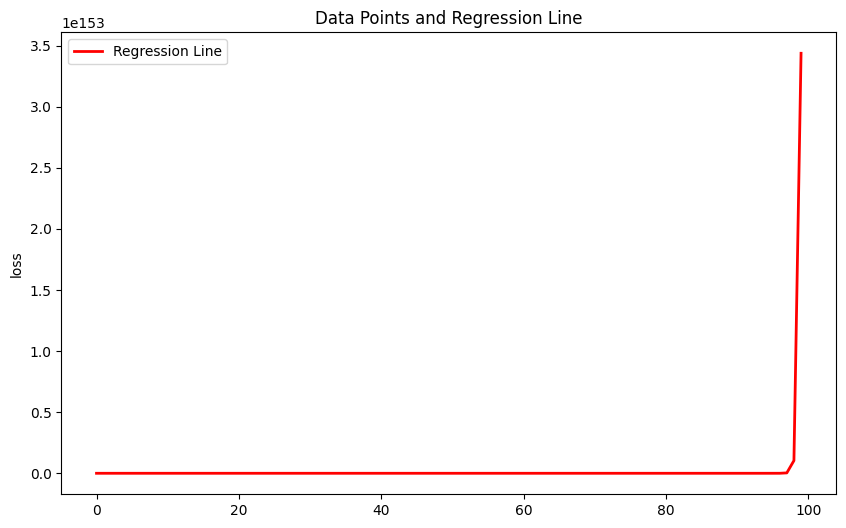

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='red', linewidth=2, label='Regression Line')
plt.ylabel('loss')
plt.title('Data Points and Regression Line')
plt.legend()
plt.show()